# MNIST PyTorch

Using nn.Module

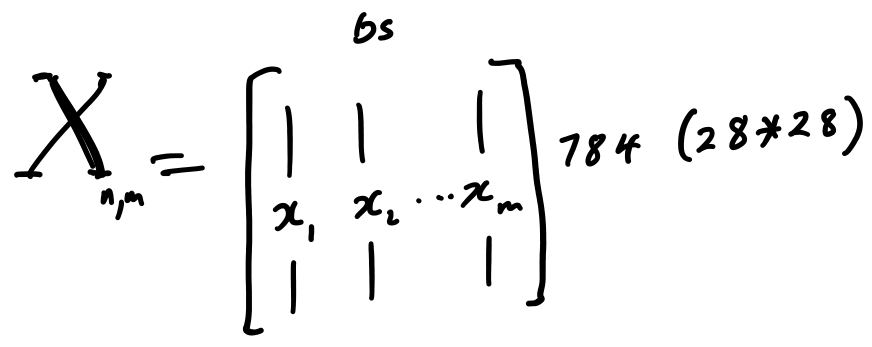


In [145]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [146]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np

import matplotlib.pyplot as plt
import gzip
from pathlib import Path
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook

In [147]:
torch.cuda.is_available()

False

### data

In [148]:
path = Path('/home/ubuntu/data')
list(path.glob('*'))

[PosixPath('/home/ubuntu/data/nietzsche'),
 PosixPath('/home/ubuntu/data/fitlam'),
 PosixPath('/home/ubuntu/data/VOCdevkit'),
 PosixPath('/home/ubuntu/data/battery_drain'),
 PosixPath('/home/ubuntu/data/dogscats'),
 PosixPath('/home/ubuntu/data/VOCtrainval_06-Nov-2007.tar'),
 PosixPath('/home/ubuntu/data/torch'),
 PosixPath('/home/ubuntu/data/hemingway.txt'),
 PosixPath('/home/ubuntu/data/mnist.pkl.gz'),
 PosixPath('/home/ubuntu/data/fastai'),
 PosixPath('/home/ubuntu/data/earthquake'),
 PosixPath('/home/ubuntu/data/wikitext'),
 PosixPath('/home/ubuntu/data/hemingway')]

In [149]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [150]:
x_train.shape, y_train.shape, x_valid.shape[0]

((50000, 784), (50000,), 10000)

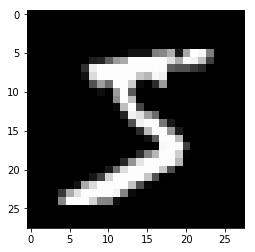

In [151]:
plt.imshow(x_train[0].reshape(28,28), cmap="gray")

## nn.Module


In [152]:
class MyLinear(nn.Module):
    def __init__(self, input_shape, output_shape):

        super(MyLinear,self).__init__()
        self.w = nn.Parameter(torch.rand(output_shape, input_shape))
        self.b = nn.Parameter(torch.ones([output_shape, 1]))
        print(self.w.shape, self.b.shape)
     
    def forward(self, x):
#         print(self.w.shape)
        A = self.w @ x + self.b 
    
        return F.relu(A)
        

In [153]:
input_d = x_train.shape[1]
output_d = 10
bs = 64

print('input',input_d, ' -> output: ', output_d)

model = MyLinear(input_d, output_d)

input 784  -> output:  10
torch.Size([10, 784]) torch.Size([10, 1])


In [158]:
# preprocess the input data
x = torch.Tensor(x_train[0].reshape(1, -1))
x.t().shape

torch.Size([784, 1])

In [159]:

model(x.t())

tensor([[52.5597],
        [56.4925],
        [54.1737],
        [49.1570],
        [60.6407],
        [57.7020],
        [54.9857],
        [54.4236],
        [59.7820],
        [52.5619]], grad_fn=<ReluBackward0>)

In [160]:
torch.norm

<function torch.functional.norm(input, p='fro', dim=None, keepdim=False, out=None)>

## Dataset & DataLoader

In [161]:
from Mnist_data import mnist_dataset

In [162]:
path = Path('/home/ubuntu/data')
ds = mnist_dataset(path)

In [163]:
train_loader = DataLoader(dataset=ds,batch_size=64,shuffle=True, num_workers=4)


torch.Size([784]) tensor(5)


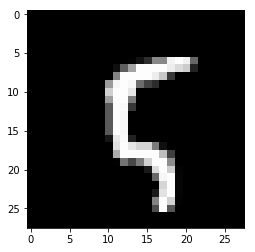

In [164]:
x,y = ds[100]
print(x.shape, y)

def open_image(x):
    plt.imshow(x.reshape(28,28), cmap='gray')

open_image(x)

In [165]:
c, classes = 10,10

x , y = ds[0]
input_d = x.shape[0]
output_d = c

c, input_d, output_d

(10, 784, 10)

## Neural Network with hidden layers

In [166]:
class MNIST_NN(nn.Module):

    def __init__(self, n_in, n_h, n_out):
        
        super(MNIST_NN, self).__init__()
        self.input = nn.Linear(n_in, n_h)
        self.hid = nn.Linear(n_h, n_h)
        self.out = nn.Linear(n_h, n_out)
    
    def forward(self, x):
#         print(x.shape)
        a1 = F.relu(self.input(x))
        a2 = F.relu(self.hid(a1))
        y_pred = F.relu(self.out(a2))
        return y_pred
        

In [167]:
model = MNIST_NN(input_d, 100, output_d)

In [168]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
for epoch in tqdm(range(4)):
    loss 
    for i, data in enumerate(train_loader):
        x, y = data
#         print(x.shape)
        y_pred = model(x) 
#         print(y_pred.shape, y.shape)
        loss = criterion(y_pred, y)
#         print(data)
#         print(loss.data)
        
#         if i % 100 == 0: print ('loss: ', loss.data) 
    
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(epoch, loss)




  0%|          | 0/4 [00:00<?, ?it/s]


 25%|██▌       | 1/4 [00:10<00:31, 10.61s/it]


 50%|█████     | 2/4 [00:21<00:21, 10.61s/it]

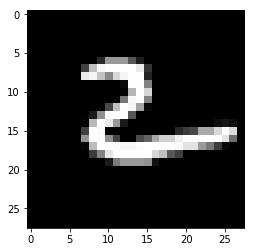

In [123]:
x, y = ds[109]
open_image(x)

In [124]:
inp = x.reshape(-1, 1).t()
pred = model(inp)

In [125]:
np.argmax(pred.detach().numpy())

4

In [126]:
pred

tensor([[4.5164e-14, 1.0572e-22, 3.5356e-21, 4.3757e-26, 1.0000e+00, 1.7816e-21,
         1.0655e-07, 6.3370e-10, 2.5248e-26, 1.0215e-16]],
       grad_fn=<SoftmaxBackward>)